<a href="https://colab.research.google.com/github/TharaThankachan/Assignment_1_Sep/blob/main/Thara.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy  as np
import matplotlib.pyplot as plt
import psycopg2 as ps

In [3]:
df=pd.read_excel('/content/iris (1).xlsx')

In [ ]:
df.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
df.isna().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

## Filling null values with median 

In [17]:
for i in ['SL','SW','PL']:
  df[i]=df[i].fillna(df[i].median())


In [4]:
df.isna().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

In [ ]:
df.shape

(150, 5)

In [ ]:
df.dtypes

SL                float64
SW                float64
PL                float64
PW                float64
Classification     object
dtype: object

In [ ]:
df['Classification'].nunique()

3

In [ ]:
df['Classification'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

## Label Encoding Classification

In [18]:
from sklearn.preprocessing import LabelEncoder

In [19]:
LE=LabelEncoder()

In [20]:
df['Classification']=LE.fit_transform(df['Classification'])

In [8]:
df.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,5.8,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [ ]:
df.tail()

,SL,SW,PL,PW,Classification
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,NaN,2.0,2
148,6.2,3.4,5.4,2.3,2
149,5.9,3.0,5.1,1.8,2


In [9]:
df.describe()

,SL,SW,PL,PW,Classification
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.853333,3.047333,3.780000,1.198667,1.000000
std,0.808567,0.421995,1.729424,0.763161,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.200000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.275000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [10]:
df.isna().count()

SL                150
SW                150
PL                150
PW                150
Classification    150
dtype: int64

In [11]:
df.isnull().values.any()

False

In [ ]:
df.iloc[147]

SL                6.50
SW                3.00
PL                4.35
PW                2.00
Classification    2.00
Name: 147, dtype: float64

In [ ]:
df.iloc[2]

SL                5.8
SW                3.2
PL                1.3
PW                0.2
Classification    0.0
Name: 2, dtype: float64

### 1) Logistic Regression

In [21]:
y=df['Classification']
x=df.drop('Classification',axis=1)

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.2)

In [24]:
from sklearn.linear_model import LogisticRegression

In [25]:
LR=LogisticRegression()

In [ ]:
LR=LR.fit(x_train,y_train)

In [27]:
y_predict=LR.predict(x_test)

In [19]:
y_predict

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

### Confusion matrix


In [28]:
from sklearn.metrics import confusion_matrix

In [21]:
confusion_matrix(y_test,y_predict)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]])

## Precision value

In [29]:
from sklearn.metrics import precision_score,recall_score

In [48]:
precision_score(y_test,y_predict,pos_label='positive',average='macro')

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1375: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  UserWarning,


1.0

## Recall value

In [47]:
recall_score(y_test,y_predict,pos_label='positive',average='macro')

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1375: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  UserWarning,


1.0

## Accuracy

In [57]:
from sklearn.metrics import accuracy_score

In [58]:
accuracy_score(y_test,y_predict)

1.0

## Report based on Logistic Regression

In [45]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_predict))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



## 2) K – Nearest Neighbour

In [59]:
from sklearn.neighbors import KNeighborsClassifier

Accuracy using range of values

In [60]:
from sklearn import neighbors
kNN_m=[]
neighbors=range(3,15)
for k in neighbors:
  classifier=KNeighborsClassifier(n_neighbors=k)
  classifier=classifier.fit(x_train,y_train)
  kNN_y_predi=classifier.predict(x_test)
  acc=accuracy_score(y_test,kNN_y_predi)
  kNN_m.append(acc)

In [61]:
kNN_m

[0.9666666666666667,
 1.0,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0]

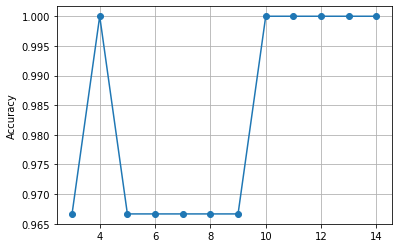

In [62]:
plt.plot(neighbors, kNN_m,'o-')
plt.xlabel=('K values')
plt.ylabel('Accuracy')
plt.grid()

## Accuracy

In [63]:
classifier=KNeighborsClassifier(n_neighbors=4)
classifier=classifier.fit(x_train,y_train)
kNN_y_predi=classifier.predict(x_test)
acc=accuracy_score(y_test,kNN_y_predi)


In [64]:
print("Accuracy:",acc)

Accuracy: 1.0


## Confusion Matrix

In [33]:
confusion_matrix(y_test,kNN_y_predi)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]])

## Precision Value

In [52]:
precision_score(y_test, kNN_y_predi,pos_label='positive',average ='macro')

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1375: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  UserWarning,


1.0

## Recall Value

In [53]:
recall_score(y_test,kNN_y_predi,pos_label='positive',average='macro')
                                           
                                           


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1375: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  UserWarning,


1.0

## Report 




In [50]:
print(classification_report(y_test,kNN_y_predi))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



### 3) Support Vector Machine (SVM)

In [37]:
from sklearn.svm import SVC

In [38]:
svm_clf=SVC(kernel='linear')

In [39]:
svm_clf=svm_clf.fit(x_train,y_train)

In [40]:
svm_y_predict=svm_clf.predict(x_test)

In [41]:
svm_y_predict

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

## Confusion Matrix

In [42]:
confusion_matrix(y_test,svm_y_predict)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]])

## Accuracy

In [43]:
accuracy_score(y_test,svm_y_predict)

1.0

## Precision Value

In [44]:
precision_score(y_test,svm_y_predict,pos_label='positive',average='macro')

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1375: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  UserWarning,


1.0

## Recall value

In [ ]:
recall_score(y_test,svm_y_predict,pos_label='positive',average='macro')

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1375: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  UserWarning,


1.0

## Report 

In [51]:
print(classification_report(y_test,svm_y_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



## **4) Decision Tree**



In [34]:
y=df['Classification']
x=df.drop('Classification',axis=1)

In [35]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.2)

In [36]:
from sklearn.tree import DecisionTreeClassifier

In [37]:
dtc=DecisionTreeClassifier()

In [38]:
dtc=dtc.fit(x_train,y_train)

In [39]:
dtc_y_predict=dtc.predict(x_test)

# Confusion Matrix

In [66]:
confusion_matrix(y_test,dtc_y_predict)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]])

In [31]:
from sklearn.metrics import accuracy_score,precision_score,recall_score

# Accuracy

In [40]:
accuracy_score(y_test,dtc_y_predict)

1.0

# Precision

In [42]:
precision_score(y_test,dtc_y_predict,pos_label='positive',average='macro')

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1375: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  UserWarning,


1.0

# Recall value

In [43]:
recall_score(y_test,dtc_y_predict,pos_label='positive',average='macro')

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1375: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  UserWarning,


1.0

# Report

In [46]:
print(classification_report(y_test,dtc_y_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



**5)Random Forest Classifier**

In [4]:
y=df['Classification']
x=df.drop('Classification',axis=1)

In [11]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.2)

In [47]:
from sklearn.ensemble import RandomForestClassifier

In [48]:
rfc=RandomForestClassifier()

In [49]:
rfc=rfc.fit(x_train,y_train)

In [50]:
rfc_y_predict=rfc.predict(x_test)

In [ ]:
y_test

# Confusion Matrix

In [51]:
confusion_matrix(y_test,rfc_y_predict)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]])

# Accuracy

In [52]:
accuracy_score(y_test,rfc_y_predict)

1.0

# Precision

In [53]:
precision_score(y_test,rfc_y_predict,pos_label='positive',average='macro')

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1375: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  UserWarning,


1.0

# Recall value

In [54]:
from operator import pos
recall_score(y_test,rfc_y_predict,pos_label='positive',average='macro')

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1375: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  UserWarning,


1.0

# Report

In [56]:
print(classification_report(y_test,rfc_y_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



# **Conclusion:**All classification models are producing similar result